In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [15]:
df = pd.read_csv("D:\download\Mobiles Dataset (2025).csv", encoding='latin1')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\1\AppData\Local\Temp\ipykernel_26724\2493960417.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("D:\download\Mobiles Dataset (2025).csv", encoding='latin1')


In [17]:
df.head()


,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [19]:
df.tail()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 66,220","INR 23,999","CNY 2,099",USD 280,"AED 1,029",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 71,220","INR 25,999","CNY 2,299",USD 300,"AED 1,099",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 604,999","INR 164,999","¥13,999","USD 1,899","AED 7,199",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 544,999","INR 176,999","CNY 15,999",USD 1719,"AED 7,699",2024
929,Samsung,Galaxy Z Fold6 1TB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,Not available,"INR 200,999","CNY 17,999","USD 2,259","AED 8,699",2024


In [21]:
df.describe()

,Launched Year
count,930.000000
mean,2022.193548
std,1.862080
min,2014.000000
25%,2021.000000
50%,2023.000000
75%,2024.000000
max,2025.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [29]:
model_count_by_company = df['Company Name'].value_counts()

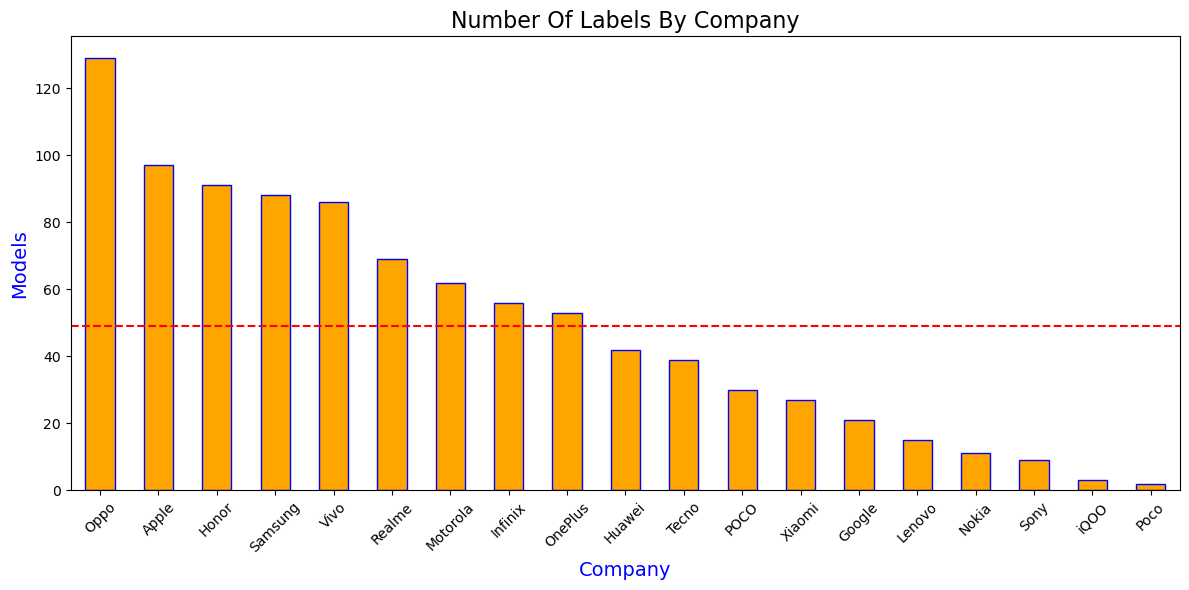

In [79]:
plt.figure(figsize = (12,6))
average_models = model_count_by_company.mean()

model_count_by_company.plot(kind = 'bar',color = 'orange',edgecolor = 'blue')
plt.title("Number Of Labels By Company",fontsize = 16)
plt.xlabel("Company",fontsize = 14,color = 'blue')
plt.ylabel("Models",fontsize = 14,color = 'blue')
plt.xticks(rotation = 45)
plt.axhline(y=average_models, color='red',linestyle = 'dashed',label = 'avg')
plt.tight_layout()

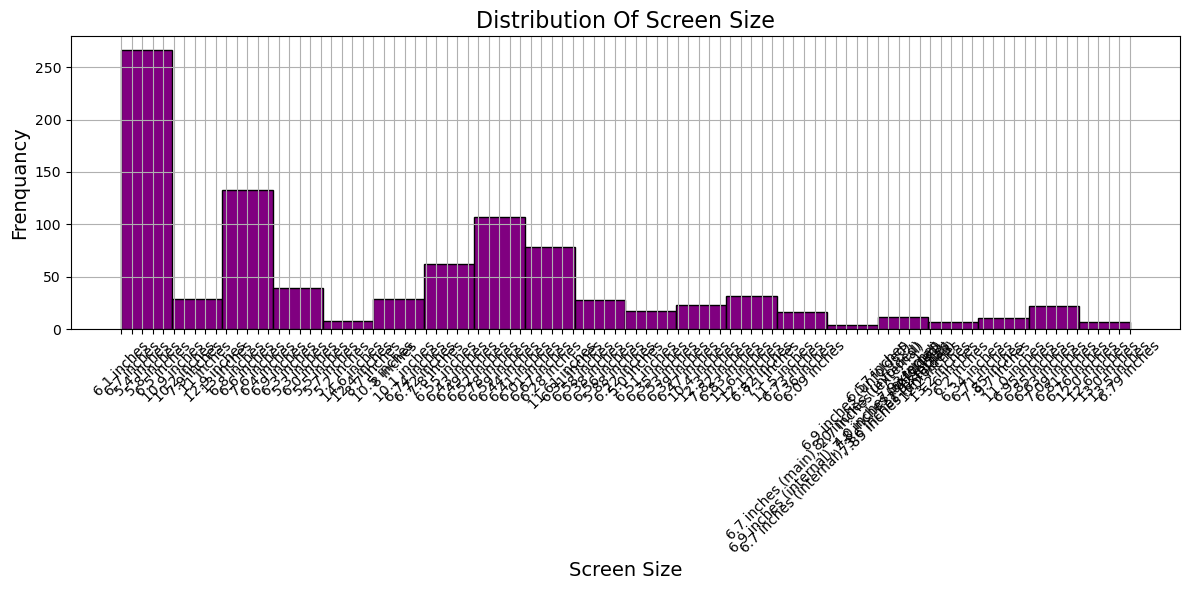

In [139]:
plt.figure(figsize = (12,6))
plt.hist(df['Screen Size'], bins = 20,color = 'purple',edgecolor = 'black')
plt.title('Distribution Of Screen Size',fontsize = 16)
plt.xlabel('Screen Size',fontsize = 14)
plt.ylabel('Frenquancy',fontsize = 14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()



In [147]:
df['Launched Price (China)']


0        CNY 5,799
1        CNY 6,099
2        CNY 6,499
3        CNY 6,199
4        CNY 6,499
          ...     
925      CNY 2,099
926      CNY 2,299
927        ¥13,999
928     CNY 15,999
929    CNY 17,999 
Name: Launched Price (China), Length: 930, dtype: object

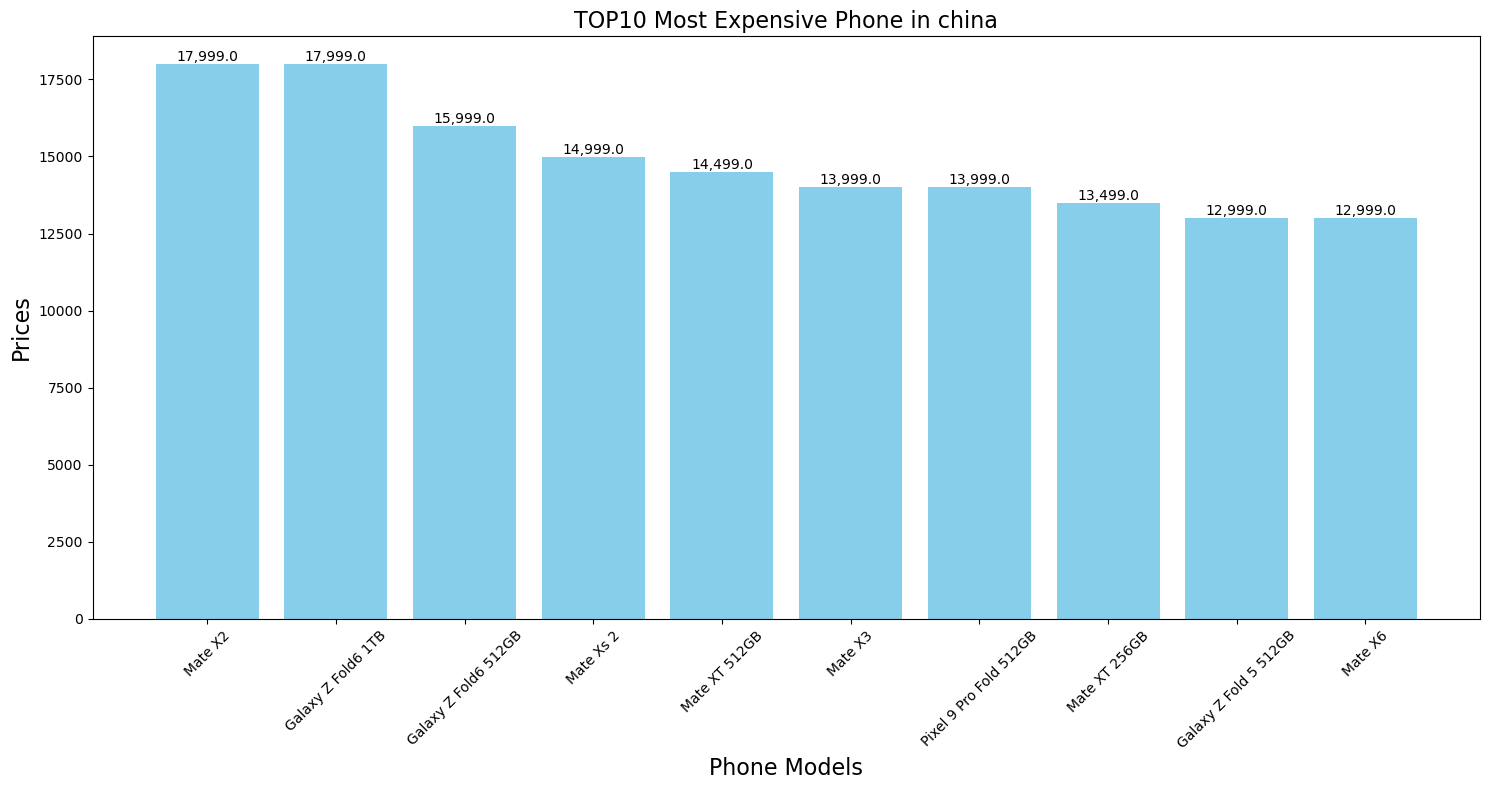

In [207]:
def Clean_Price(price):
    if isinstance(price,str):

        price = price.replace('CNY','').replace(',','').strip()

        if price.isdigit():
            return int(price)
    return None

df['Launched Price (China) Cleaned'] = df['Launched Price (China)'].apply(Clean_Price)
df['Launched Price (China) Cleaned'] = pd.to_numeric(df['Launched Price (China) Cleaned'], errors='coerce')
df.head()
df_filtered = df.dropna(subset=['Launched Price (China) Cleaned'])
top10_expensive_mobiles = df_filtered.nlargest(10, 'Launched Price (China) Cleaned')

plt.figure(figsize = (15,8))
plt.bar(top10_expensive_mobiles['Model Name'],top10_expensive_mobiles['Launched Price (China) Cleaned'],color = 'skyblue')
plt.title('TOP10 Most Expensive Phone in china',fontsize = 16)
plt.xlabel('Phone Models',fontsize = 16)
plt.ylabel('Prices',fontsize = 16)
plt.xticks(rotation = 45)
plt.tight_layout()

for i, price in enumerate(top10_expensive_mobiles['Launched Price (China) Cleaned']):
    plt.text(i, price, f'{price:,}', ha='center', va='bottom')

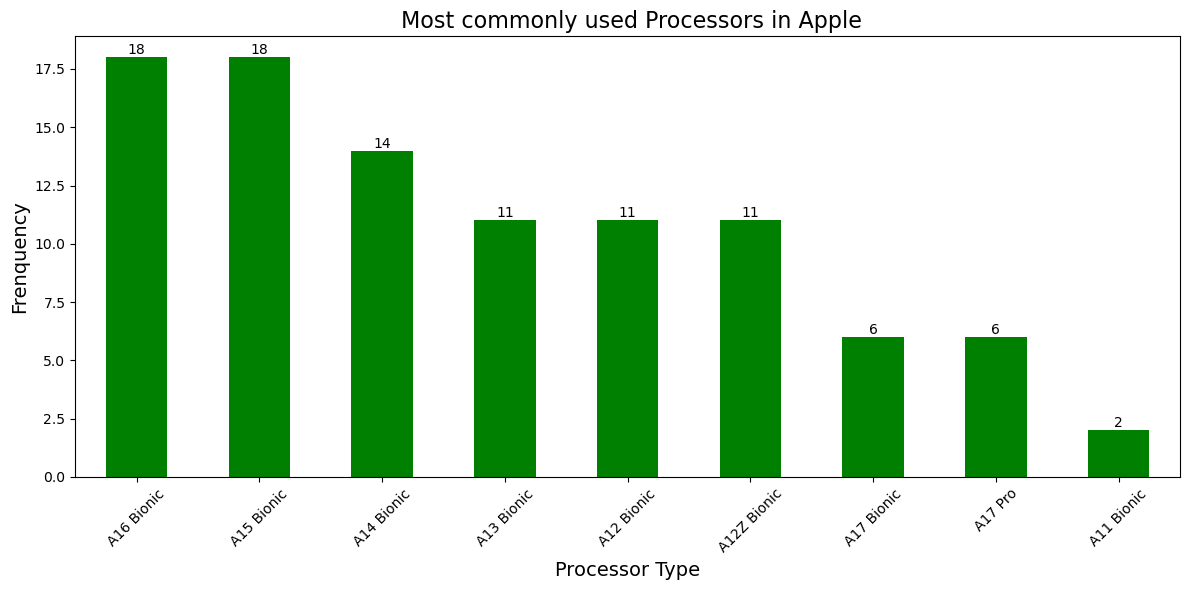

In [235]:
apple_phones = df[df['Company Name']=='Apple']
processors_count = apple_phones['Processor'].value_counts()
plt.figure(figsize = (12,6))
processors_count.plot(kind = 'bar',color = 'green')
plt.title(" Most commonly used Processors in Apple",fontsize = 16 )
plt.xlabel("Processor Type",fontsize = 14)
plt.ylabel("Frenquency",fontsize =14)
plt.xticks(rotation = 45)
plt.tight_layout()

for i,frequency in enumerate(processors_count):
    plt.text(i,frequency,f'{frequency}',ha = 'center',va = 'bottom')




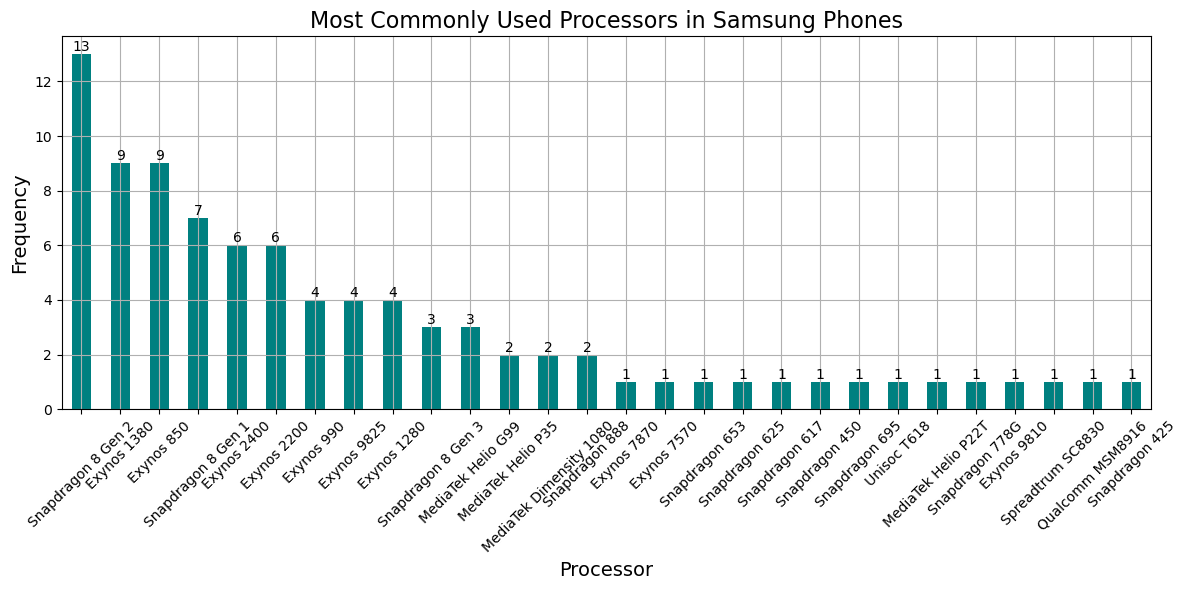

In [241]:
samsung_phones = df[df['Company Name'].str.lower() == 'samsung']


processor_counts = samsung_phones['Processor'].value_counts()


plt.figure(figsize=(12, 6))
processor_counts.plot(kind='bar', color='teal')
plt.title('Most Commonly Used Processors in Samsung Phones', fontsize=16)
plt.xlabel('Processor', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)


for i, count in enumerate(processor_counts):
    plt.text(i, count, f'{count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()




In [243]:
samsung_phones = df[df['Company Name'].str.lower() == 'samsung']

samsung_2024 = samsung_phones[samsung_phones['Launched Year'] == 2024]

if not samsung_2024.empty:
    print("Samsung Phones Launched in 2024:")
    print(samsung_2024[['Company Name', 'Model Name', 'RAM', 'Battery Capacity', 'Screen Size']])
else:
    print("No Samsung phones were launched in 2024.")

Samsung Phones Launched in 2024:
    Company Name                 Model Name   RAM Battery Capacity Screen Size
97       Samsung     Galaxy S24 Ultra 128GB  12GB          5000mAh  6.8 inches
98       Samsung     Galaxy S24 Ultra 256GB  12GB          5000mAh  6.8 inches
99       Samsung          Galaxy S24+ 128GB   8GB          4800mAh  6.6 inches
100      Samsung          Galaxy S24+ 256GB   8GB          4800mAh  6.6 inches
101      Samsung           Galaxy S24 128GB   8GB          4000mAh  6.1 inches
102      Samsung           Galaxy S24 256GB   8GB          4000mAh  6.1 inches
177      Samsung  Galaxy Tab Active 5 128GB   6GB          5050mAh    8 inches
927      Samsung       Galaxy Z Fold6 256GB  12GB          4400mAh  7.6 inches
928      Samsung       Galaxy Z Fold6 512GB  12GB          4400mAh  7.6 inches
929      Samsung         Galaxy Z Fold6 1TB  12GB          4400mAh  7.6 inches


In [245]:
phones_2025 = df[df['Launched Year'] == 2025]

if not phones_2025.empty:
    print("Phones Released in 2025:")
    print(phones_2025[['Company Name', 'Model Name','RAM', 'Battery Capacity', 'Screen Size']])
else:
    print("No phones were released in 2025.")

Phones Released in 2025:
    Company Name         Model Name   RAM Battery Capacity  Screen Size
328         Oppo  Reno13 F 4G 256GB   8GB          5800mAh  6.67 inches
329         Oppo     Reno13 F 256GB   8GB          5800mAh  6.67 inches
330         Oppo   Reno13 Pro 512GB  12GB          5800mAh  6.83 inches
331         Oppo       Reno13 256GB  12GB          5600mAh  6.59 inches
460       Realme   14 Pro+ 5G 256GB  12GB         6,000mAh  6.83 inches
461       Realme   14 Pro+ 5G 512GB  12GB         6,000mAh  6.83 inches
462       Realme    14 Pro 5G 128GB   8GB         5,800mAh   6.7 inches
463       Realme    14 Pro 5G 256GB   8GB         5,800mAh   6.7 inches
464       Realme       14x 5G 128GB   6GB         5,500mAh   6.6 inches
465       Realme       14x 5G 256GB   8GB         5,500mAh   6.6 inches
922         POCO           X7 128GB   6GB          5000mAh  6.67 inches
923         POCO       X7 Pro 256GB   8GB          6000mAh  6.67 inches


Samsung ke phones ki average weight:  256.6931818181818 g
Apple ke phones ki average weight:  258.07216494845363 g


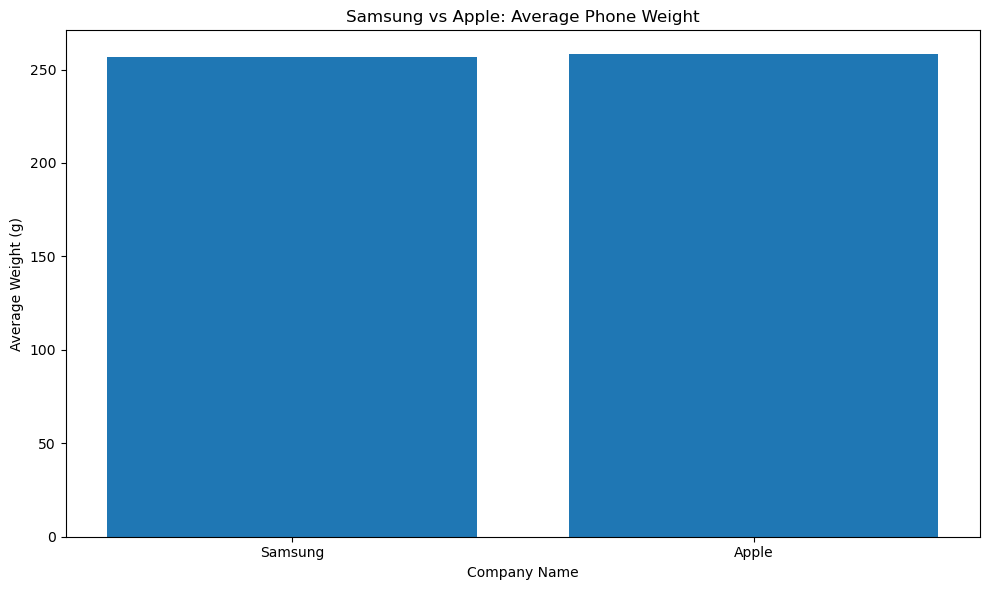

In [247]:
samsung_phones = df.loc[df['Company Name'] == 'Samsung'].copy()
apple_phones = df.loc[df['Company Name'] == 'Apple'].copy()


samsung_phones['Mobile Weight'] = pd.to_numeric(samsung_phones['Mobile Weight'].str.replace('g', '').str.replace(' ', ''), errors='coerce')
apple_phones['Mobile Weight'] = pd.to_numeric(apple_phones['Mobile Weight'].str.replace('g', '').str.replace(' ', ''), errors='coerce')


avg_samsung_weight = samsung_phones['Mobile Weight'].mean()
avg_apple_weight = apple_phones['Mobile Weight'].mean()


print("Samsung ke phones ki average weight: ", avg_samsung_weight, "g")
print("Apple ke phones ki average weight: ", avg_apple_weight, "g")

plt.figure(figsize=(10, 6))
plt.bar(['Samsung', 'Apple'], [avg_samsung_weight, avg_apple_weight])
plt.xlabel('Company Name')
plt.ylabel('Average Weight (g)')
plt.title('Samsung vs Apple: Average Phone Weight')
plt.tight_layout()
plt.show()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\1\AppData\Local\Temp\ipykernel_26724\2602215101.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Front Camera'] = df['Front Camera'].str.extract('(\d+)', expand=False).astype(float)


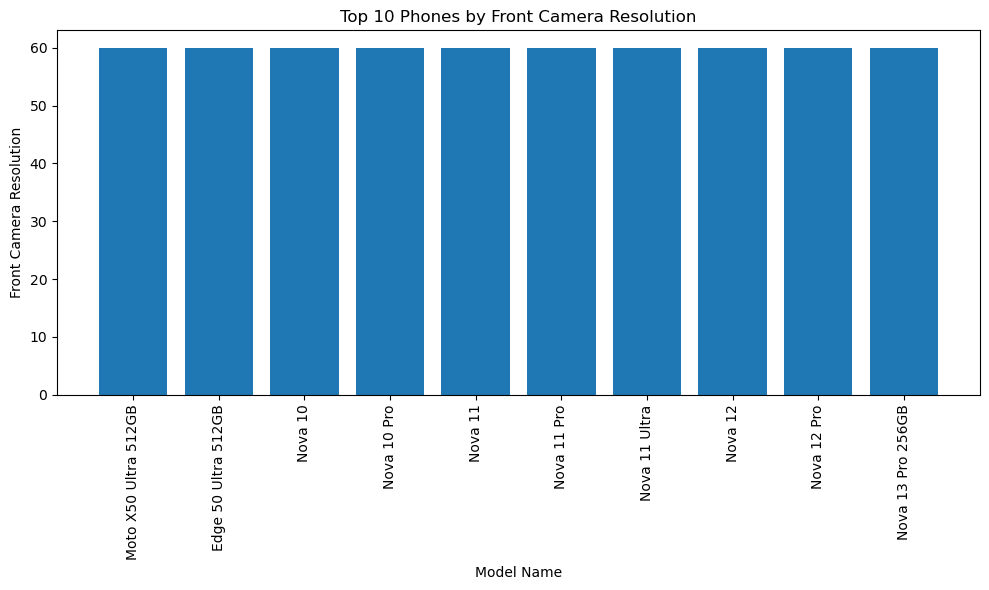

In [249]:
df['Front Camera'] = df['Front Camera'].str.extract('(\d+)', expand=False).astype(float)

top_10_phones = df.nlargest(10, 'Front Camera')

plt.figure(figsize=(10, 6))
plt.bar(top_10_phones['Model Name'], top_10_phones['Front Camera'])
plt.xlabel('Model Name')
plt.ylabel('Front Camera Resolution')
plt.title('Top 10 Phones by Front Camera Resolution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

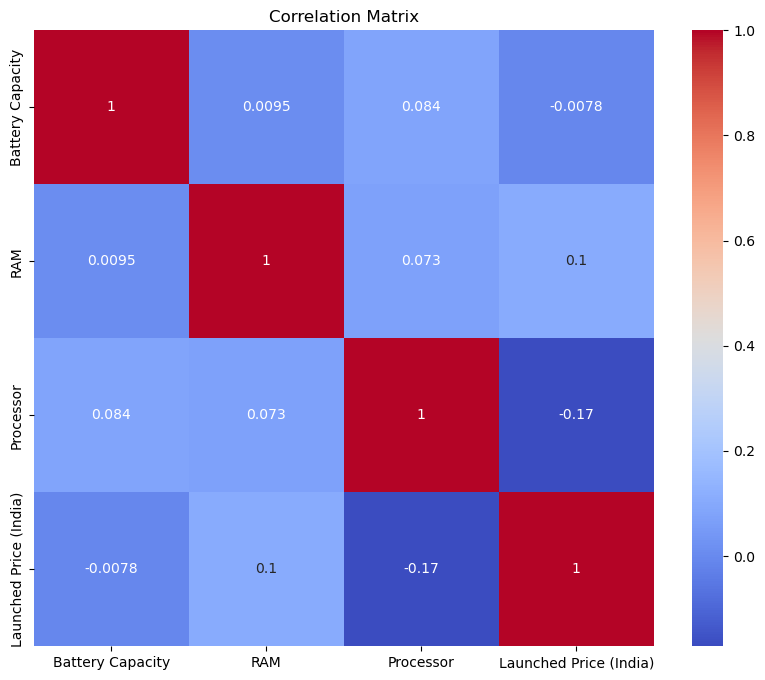

In [251]:
df['Battery Capacity'] = df['Battery Capacity'].str.replace('mAh', '').str.replace(',', '').astype(float)

df['RAM'] = df['RAM'].str.replace('GB', '').str.replace('/', '').str.replace(' ', '').astype(float)

df['Launched Price (India)'] = df['Launched Price (India)'].str.replace('INR ', '').str.replace(',', '').astype(float)

le = LabelEncoder()
df['Processor'] = le.fit_transform(df['Processor'])

corr_matrix = df[['Battery Capacity', 'RAM', 'Processor', 'Launched Price (India)']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


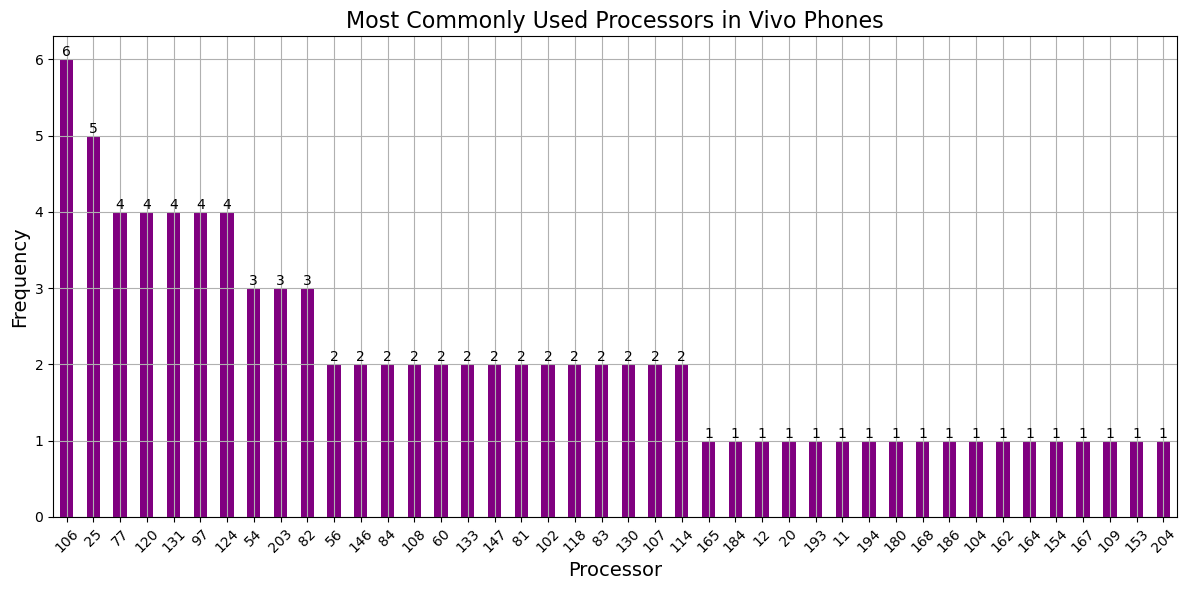

In [253]:
vivo_phones = df[df['Company Name'].str.lower() == 'vivo']


processor_counts = vivo_phones['Processor'].value_counts()


plt.figure(figsize=(12, 6))
processor_counts.plot(kind='bar', color='purple')
plt.title('Most Commonly Used Processors in Vivo Phones', fontsize=16)
plt.xlabel('Processor', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)


for i, count in enumerate(processor_counts):
    plt.text(i, count, f'{count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


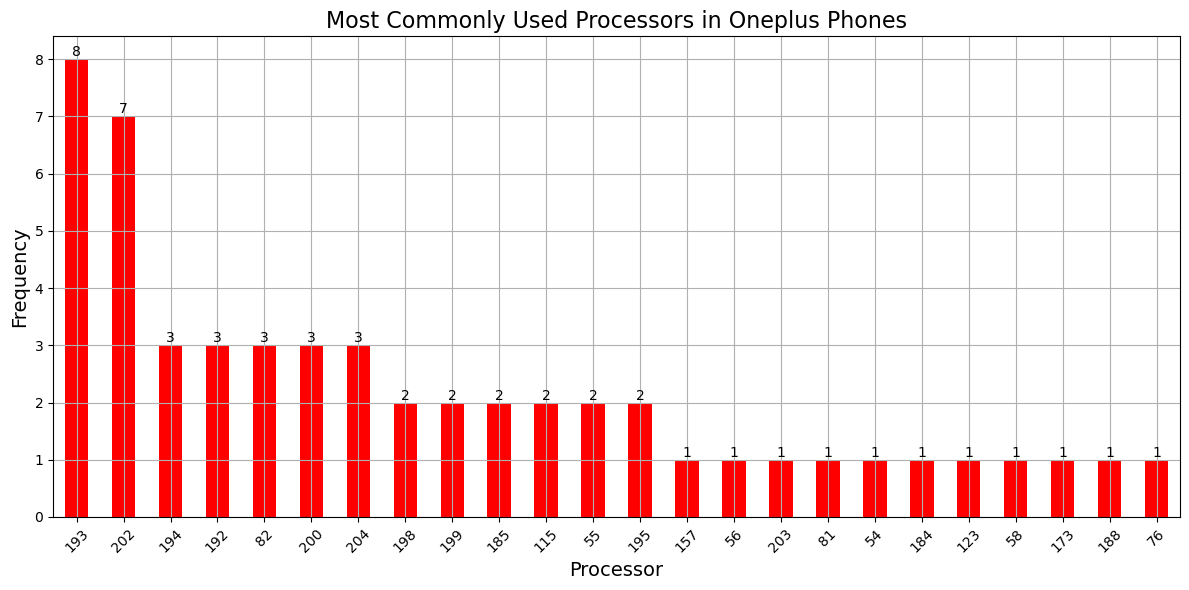

In [255]:
oneplus_phones = df[df['Company Name'].str.lower() == 'oneplus']


processor_counts = oneplus_phones['Processor'].value_counts()

plt.figure(figsize=(12, 6))
processor_counts.plot(kind='bar', color='red')
plt.title('Most Commonly Used Processors in Oneplus Phones', fontsize=16)
plt.xlabel('Processor', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)


for i, count in enumerate(processor_counts):
    plt.text(i, count, f'{count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()